In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-data-for-digit-recognation/t10k-images-idx3-ubyte.gz
/kaggle/input/mnist-data-for-digit-recognation/train-images.idx3-ubyte
/kaggle/input/mnist-data-for-digit-recognation/t10k-labels-idx1-ubyte.gz
/kaggle/input/mnist-data-for-digit-recognation/train-labels-idx1-ubyte.gz
/kaggle/input/mnist-data-for-digit-recognation/t10k-labels.idx1-ubyte
/kaggle/input/mnist-data-for-digit-recognation/t10k-images.idx3-ubyte
/kaggle/input/mnist-data-for-digit-recognation/train-labels.idx1-ubyte
/kaggle/input/mnist-data-for-digit-recognation/train-images-idx3-ubyte.gz


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os

In [12]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

# Loading Data

In [13]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain, xtest = xtrain / 255.0, xtest / 255.0

11490434/11490434 [==============================] - 0s 0us/step


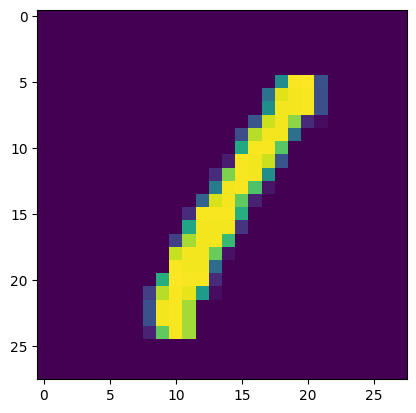

In [14]:
plt.imshow(xtrain[3])

# Building the model

In [148]:
# model = Sequential([
#     Dense(units = 50, activation = 'relu', input_shape=(28, 28)),
#     Dense(units = 50, activation = 'relu'),
#     Dense(units = 10, activation = 'softmax')
# ])
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(units=25, activation='sigmoid'),
    Dense(units=15, activation='sigmoid'),
    Dense(units=10)  # No activation function here
])

In [149]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [150]:
# model.compile(optimizer='adam',
#               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-3),
             loss= SparseCategoricalCrossentropy(from_logits= True), metrics= ['accuracy'])

In [151]:
model.fit(xtrain, ytrain, epochs= 100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0020 - accuracy: 0.7701
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3410 - accuracy: 0.9143
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2398 - accuracy: 0.9350
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1980 - accuracy: 0.9442
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1731 - accuracy: 0.9510
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1555 - accuracy: 0.9561
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9596
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1317 - accuracy: 0.9628
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1228 - accuracy: 0.9649
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [152]:
logist = model(xtrain)

In [153]:
f_x = tf.nn.softmax(logist)

In [154]:
f_x

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[1.1089344e-06, 4.4219300e-06, 5.3859017e-06, ..., 2.6952193e-07,
        9.2925800e-09, 4.9139635e-05],
       [9.9999863e-01, 8.1792145e-10, 1.1414961e-06, ..., 9.7673329e-08,
        4.6784510e-08, 7.0151236e-09],
       [1.4978945e-09, 1.8641159e-10, 4.2898288e-10, ..., 1.3832639e-07,
        6.4388234e-07, 1.3653256e-05],
       ...,
       [5.0401585e-09, 5.7913014e-04, 2.4497922e-14, ..., 4.4559803e-10,
        6.2315131e-08, 1.0713055e-06],
       [6.2280217e-09, 5.6524612e-09, 1.5030826e-08, ..., 1.5389155e-11,
        1.0416530e-09, 2.3773716e-11],
       [1.1931190e-06, 8.1837970e-05, 3.3698569e-10, ..., 1.0334653e-09,
        9.8278278e-01, 1.3182220e-02]], dtype=float32)>

In [155]:
val_loss, val_acc = model.evaluate(xtest, ytest)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2607 - accuracy: 0.9547
0.2607146203517914 0.9546999931335449


In [156]:
predictions = model.predict(xtest)

313/313 [==============================] - 0s 1ms/step


In [157]:
predictions

array([[ -1.9377902 , -13.091473  ,   6.9516363 , ...,  10.09639   ,
         -4.8856235 ,  -5.730879  ],
       [-10.815612  ,  -4.9153695 ,  11.258619  , ...,  -9.044713  ,
         -8.937554  , -14.829709  ],
       [-19.783663  ,  11.736203  ,  -8.63281   , ...,  -6.8855667 ,
          0.8282222 ,  -9.524618  ],
       ...,
       [-11.077584  , -13.769971  , -17.569523  , ...,  -3.7153203 ,
         -2.6238115 ,   4.7282877 ],
       [-13.017356  ,  -2.8789997 , -25.71166   , ..., -18.014866  ,
         -0.46092987,  -1.6926918 ],
       [ -9.311504  ,  -9.185061  ,  -6.389574  , ..., -16.931211  ,
         -8.050334  ,  -9.017062  ]], dtype=float32)

In [158]:
model.predict([xtest])

313/313 [==============================] - 0s 1ms/step


array([[ -1.9377902 , -13.091473  ,   6.9516363 , ...,  10.09639   ,
         -4.8856235 ,  -5.730879  ],
       [-10.815612  ,  -4.9153695 ,  11.258619  , ...,  -9.044713  ,
         -8.937554  , -14.829709  ],
       [-19.783663  ,  11.736203  ,  -8.63281   , ...,  -6.8855667 ,
          0.8282222 ,  -9.524618  ],
       ...,
       [-11.077584  , -13.769971  , -17.569523  , ...,  -3.7153203 ,
         -2.6238115 ,   4.7282877 ],
       [-13.017356  ,  -2.8789997 , -25.71166   , ..., -18.014866  ,
         -0.46092987,  -1.6926918 ],
       [ -9.311504  ,  -9.185061  ,  -6.389574  , ..., -16.931211  ,
         -8.050334  ,  -9.017062  ]], dtype=float32)

In [165]:
print(np.argmax(predictions[100]))

6


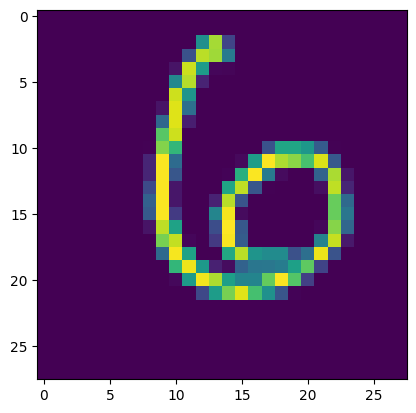

In [166]:
plt.imshow(xtest[100])
plt.show()

In [163]:
print(np.argmax(predictions[0]))

7


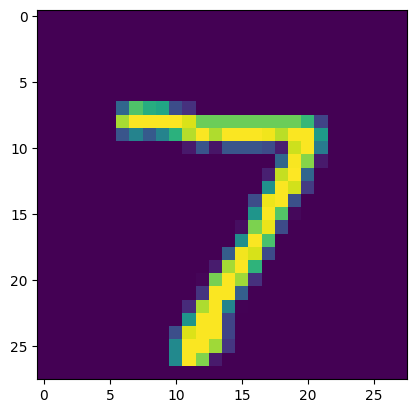

In [164]:
plt.imshow(xtest[0])
plt.show()